In [1]:
#Importamos lo necesario en la siguiente celda

In [2]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  # me muestre todas las columnas
pd.set_option('display.max_rows', None)  # me muestre todas las filas
# para pintar
import pylab as plt
import seaborn as sns
import re
import pylab as plt



In [4]:
#Carga de data

In [5]:
df_ori = pd.read_csv('attacks.csv',encoding= "ISO-8859-1")

df=df_ori.copy() #trabajamos con una copia de los datos para prevenir perdidas de información

In [6]:
#Examinos el dato para ver que forma tiene

In [7]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [89]:
df.describe()


,case_number,year,original_order,fatal_count
count,6283.000000,6283.000000,6283.000000,6283.000000
mean,3151.864078,1927.181124,3152.135763,0.220914
std,1818.633812,281.470621,1818.634038,0.414895
min,1.000000,0.000000,2.000000,0.000000
25%,1577.500000,1942.000000,1577.500000,0.000000
50%,3152.000000,1977.000000,3152.000000,0.000000
75%,4726.500000,2005.000000,4726.500000,0.000000
max,6302.000000,2018.000000,6303.000000,1.000000


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Case Number,8702,6287,0,2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,6302,5433,1957,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6300.0,NaN,NaN,NaN,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
Type,6298,8,Unprovoked,4595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,6252,212,USA,2229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,5847,825,Florida,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5762,4108,"New Smyrna Beach, Volusia County",163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Activity,5758,1532,Surfing,971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,6092,5230,male,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,5737,6,M,5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(25723, 24)

In [11]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [12]:
#Miramos nulos y Nan
nan_cols = df.isna().sum()

nan_cols[nan_cols>0]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

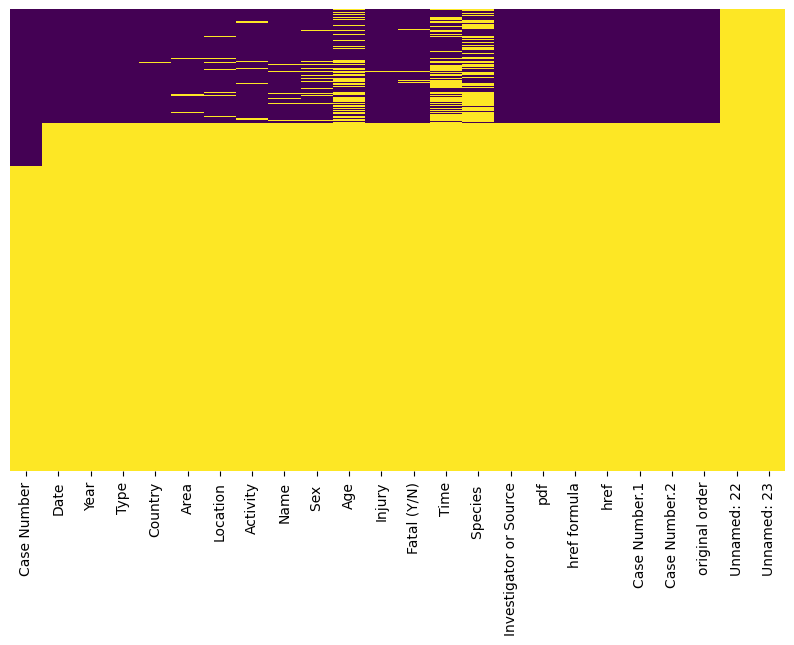

In [13]:
# grafico de nulos en el dataframe

plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

sns.heatmap(df.isna(),   # datos
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [14]:
#definimos una función para comprobar rapidamente el grafico
def check_nan(df: pd.DataFrame) -> None:
    
    """Recibe un dataframe y enseña % de valores nulos y la grafica"""
    
    nan_cols = df.isna().mean()  * 100  # porcentaje de nulo en cada columna

    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    # grafico de nulos en el dataframe
    plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

    sns.heatmap(df.isna(),   # datos
                yticklabels=False,
                cmap='viridis',
                cbar=False
               )

    plt.show();

'N nan cols: 24'

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

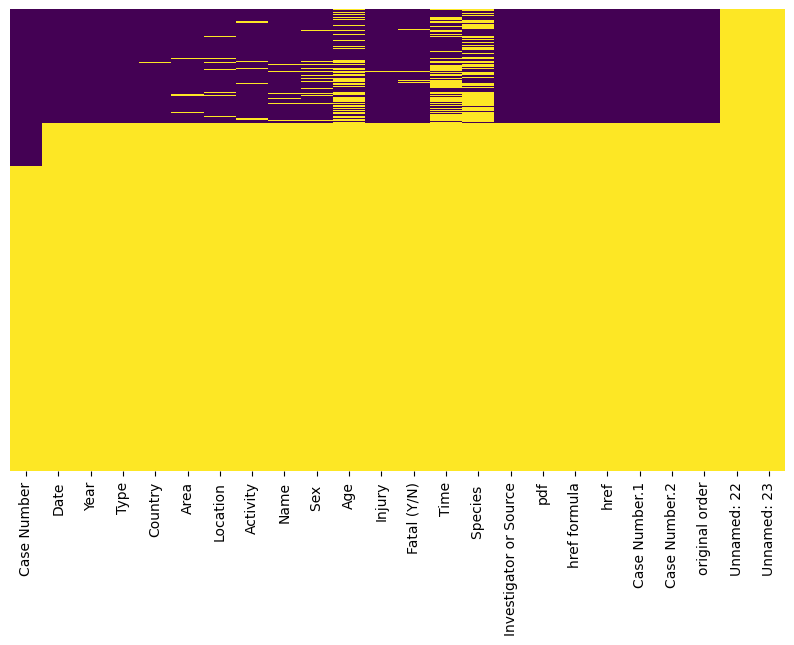

In [15]:
check_nan(df)

In [16]:
#eliminamos filas rellenas solo con nan, ya que no nos aportan ningun tipo de información.
df=df.dropna(axis=0,how='all')

In [17]:
df.shape

(8703, 24)

In [18]:
#estandarizamos los nombres de columnas y eliminamos las filas que solo tienen case_number y el resto es nan
df.columns = df.columns.str.lower().str.replace(" ", "_")
subset= list(df.columns)
subset.pop(0)
print(subset)
df = df.dropna(subset=subset, how='all')

['date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time', 'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22', 'unnamed:_23']


'N nan cols: 23'

case_number                0.015850
date                       0.110953
year                       0.142653
type                       0.174354
country                    0.903471
area                       7.322872
location                   8.670154
activity                   8.733555
name                       3.439531
sex_                       9.066413
age                       44.983357
injury                     0.554763
fatal_(y/n)                8.654303
time                      53.273102
species_                  45.094310
investigator_or_source     0.380409
pdf                        0.110953
href_formula               0.126803
href                       0.110953
case_number.1              0.110953
case_number.2              0.110953
unnamed:_22               99.984150
unnamed:_23               99.968299
dtype: float64

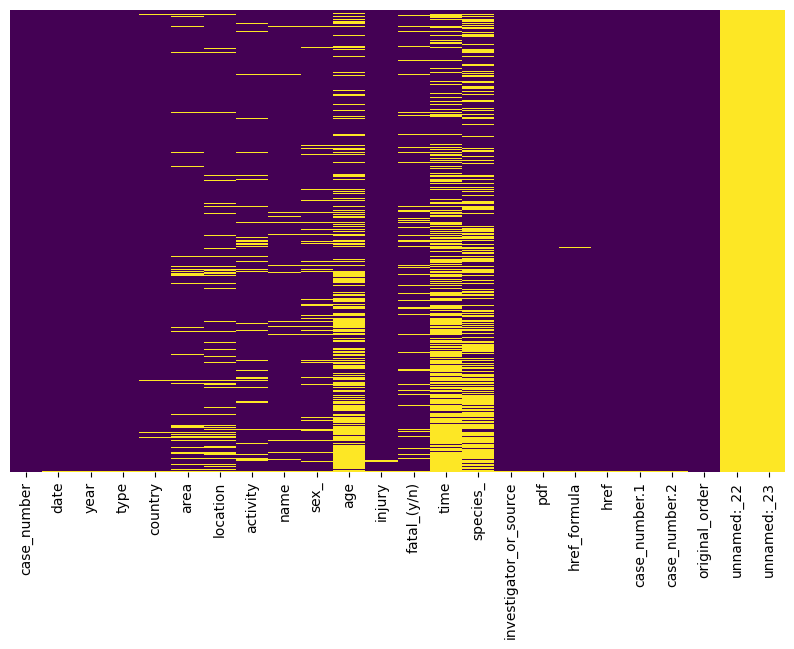

In [19]:
check_nan(df)

In [20]:
df.shape



(6309, 24)

In [21]:
df.date.dropna(inplace=True)

In [22]:
df.date.isna().any()

True

In [23]:
df.shape

(6309, 24)

In [24]:
#viendo la grafica observamos con las 2 ultimas columnas aparecen llenas de nan y quitamos depaso el resto de nan
df['unnamed:_22'] = df['unnamed:_22'].fillna("unknow")
df['unnamed:_23'] = df['unnamed:_23'].fillna("unknow")
df.type.fillna('unknown', inplace=True)
df.country.fillna('unknown', inplace=True)
df.area.fillna('unknown', inplace=True)
df.location.fillna('unknown', inplace=True)
df.activity.fillna('unknown', inplace=True)
df.name.fillna('unknown', inplace=True)
df.sex_.fillna('unknown', inplace=True)
df.age.fillna('unknown', inplace=True)
df.injury.fillna('unknown', inplace=True)
df['fatal_(y/n)']=df['fatal_(y/n)'].fillna('unknown')
df.time.fillna('unknown', inplace=True)
df.date.fillna('unknown', inplace=True)
df.href.dropna(inplace=True)
df.year.fillna('unknown', inplace=True)
df.investigator_or_source.dropna(inplace=True)
df.pdf.dropna(inplace=True)
df.href_formula.dropna(inplace=True)



'N nan cols: 8'

case_number                0.015850
species_                  45.094310
investigator_or_source     0.380409
pdf                        0.110953
href_formula               0.126803
href                       0.110953
case_number.1              0.110953
case_number.2              0.110953
dtype: float64

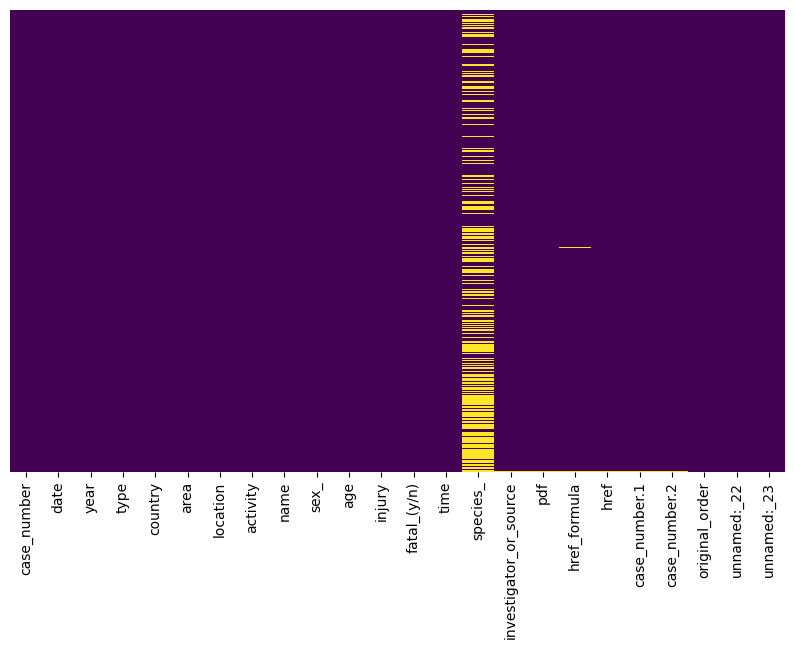

In [25]:

check_nan(df)

In [26]:
df['fatal_(y/n)'].unique()

array(['N', 'Y', 'unknown', 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

'N nan cols: 8'

case_number                0.015850
species_                  45.094310
investigator_or_source     0.380409
pdf                        0.110953
href_formula               0.126803
href                       0.110953
case_number.1              0.110953
case_number.2              0.110953
dtype: float64

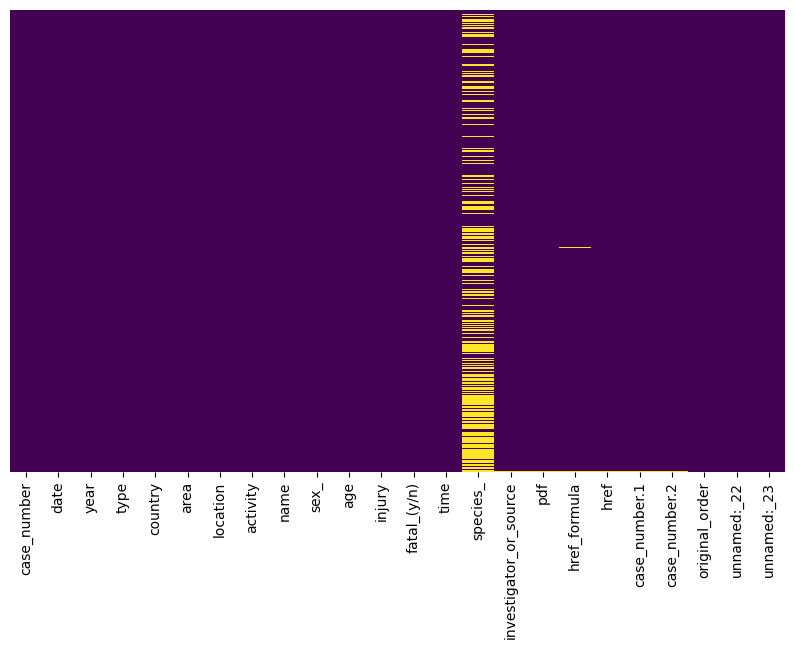

In [27]:
check_nan(df)

In [28]:
#vaciamos de nan species
df.species_.head()
df.species_ = df.species_.fillna("unknown")


'N nan cols: 7'

case_number               0.015850
investigator_or_source    0.380409
pdf                       0.110953
href_formula              0.126803
href                      0.110953
case_number.1             0.110953
case_number.2             0.110953
dtype: float64

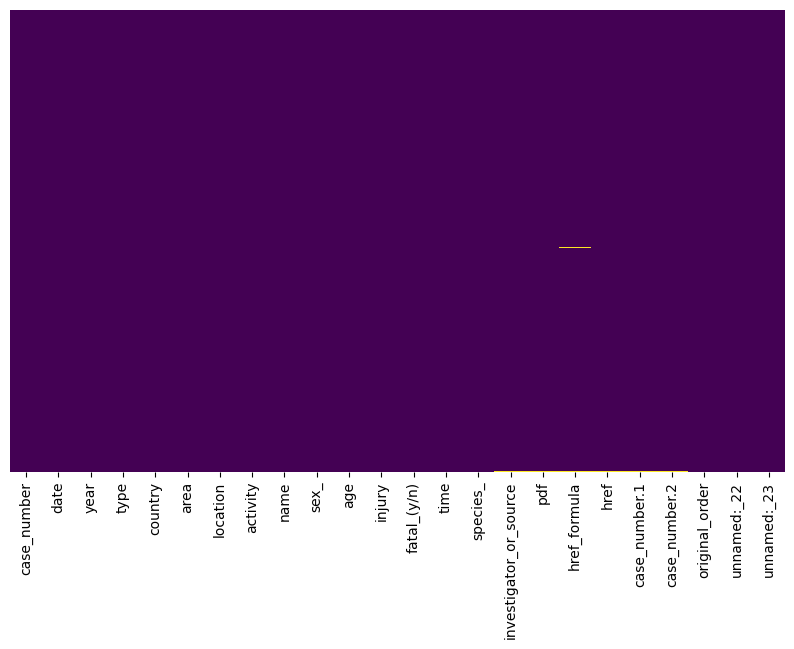

In [29]:
check_nan(df)

In [30]:
#quitar nan en href_formula
df.href_formula= df.href_formula.fillna('unknown')

'N nan cols: 6'

case_number               0.015850
investigator_or_source    0.380409
pdf                       0.110953
href                      0.110953
case_number.1             0.110953
case_number.2             0.110953
dtype: float64

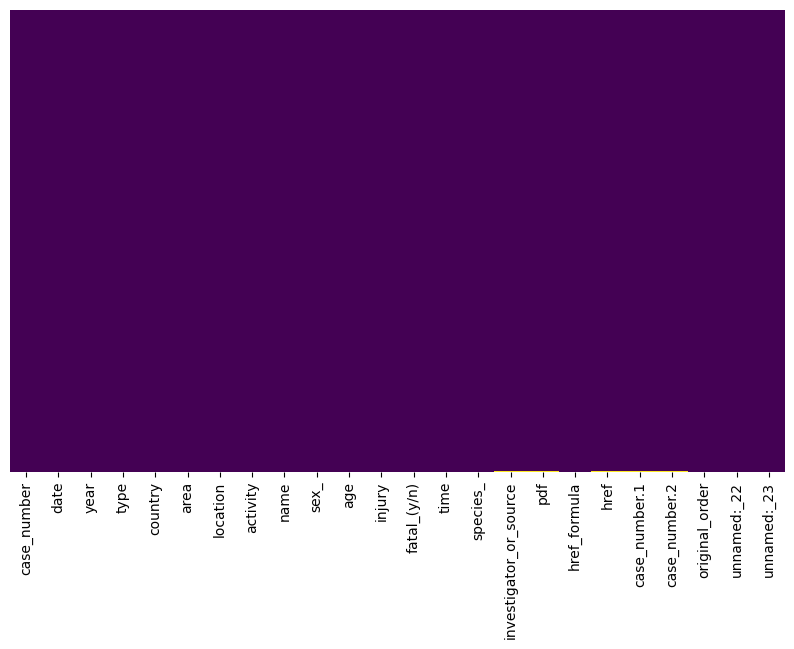

In [31]:
check_nan(df)

In [32]:
df.case_number.value_counts()

0                     7
1980.07.00            2
2006.09.02            2
2012.09.02.b          2
1913.08.27.R          2
1907.10.16.R          2
1962.06.11.b          2
2009.12.18            2
2014.08.02            2
1990.05.10            2
2013.10.05            2
1983.06.15            2
2005.04.06            2
1920.00.00.b          2
1915.07.06.a.R        2
1966.12.26            2
1923.00.00.a          2
1956.10.27            1
1957.04.07.b          1
1957.04.13            1
1957.04.22            1
1956.12.09            1
1957.04.23            1
1957.04.28            1
1957.05.00            1
1957.05.07            1
1957.00.00.c          1
1957.06.21            1
1957.07.09            1
1957.07.15            1
1956.10.20            1
1957.07.24            1
1956.10.07            1
1957.08.00            1
1957.09.02            1
1957.05.11            1
1957.04.07.a          1
1957.02.24            1
1957.00.00.a          1
1957.00.00.b          1
1957.00.00.d          1
1957.00.00.e    

In [33]:
df.case_number = [int(e) for e in range (1,len(df)+1)]
df.case_number.head()


0    1
1    2
2    3
3    4
4    5
Name: case_number, dtype: int64

In [34]:
df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

'N nan cols: 5'

investigator_or_source    0.380409
pdf                       0.110953
href                      0.110953
case_number.1             0.110953
case_number.2             0.110953
dtype: float64

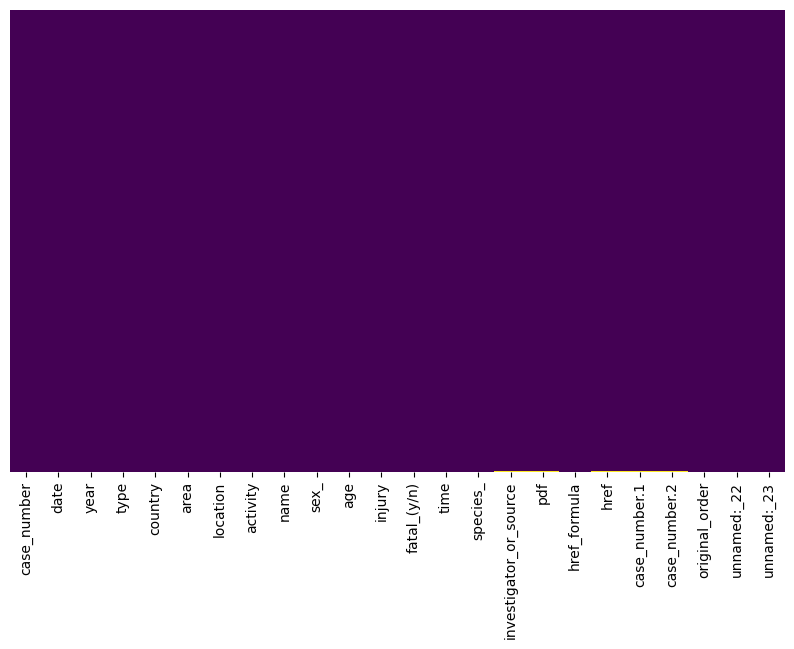

In [35]:
check_nan(df)

In [36]:
#miramos y comprobamos original order

df.original_order.isna().any() #no hay nan

False

In [37]:
df.original_order.value_counts()

569.0     2
6303.0    1
2102.0    1
2093.0    1
2094.0    1
2095.0    1
2096.0    1
2097.0    1
2098.0    1
2099.0    1
2100.0    1
2101.0    1
2103.0    1
2091.0    1
2104.0    1
2105.0    1
2106.0    1
2107.0    1
2108.0    1
2109.0    1
2110.0    1
2111.0    1
2112.0    1
2113.0    1
2092.0    1
2090.0    1
2115.0    1
2078.0    1
2069.0    1
2070.0    1
2071.0    1
2072.0    1
2073.0    1
2074.0    1
2075.0    1
2076.0    1
2077.0    1
2079.0    1
2089.0    1
2080.0    1
2081.0    1
2082.0    1
2083.0    1
2084.0    1
2085.0    1
2086.0    1
2087.0    1
2088.0    1
2114.0    1
2116.0    1
2067.0    1
2117.0    1
2142.0    1
2143.0    1
2144.0    1
2145.0    1
2146.0    1
2147.0    1
2148.0    1
2149.0    1
2150.0    1
2151.0    1
2152.0    1
2153.0    1
2154.0    1
2155.0    1
2156.0    1
2157.0    1
2158.0    1
2159.0    1
2160.0    1
2161.0    1
2162.0    1
2141.0    1
2140.0    1
2139.0    1
2127.0    1
2118.0    1
2119.0    1
2120.0    1
2121.0    1
2122.0    1
2123.0    1
2124

In [38]:
valores_repetidos = df.original_order.value_counts()
valores_a_eliminar = df["original_order"].value_counts()[df["original_order"].value_counts() == 2].index
df = df[~df["original_order"].isin(valores_a_eliminar)]

In [39]:
df.shape


(6307, 24)

In [40]:
df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [41]:
#comprobamos year
df.isna().any()

case_number               False
date                      False
year                      False
type                      False
country                   False
area                      False
location                  False
activity                  False
name                      False
sex_                      False
age                       False
injury                    False
fatal_(y/n)               False
time                      False
species_                  False
investigator_or_source     True
pdf                        True
href_formula              False
href                       True
case_number.1              True
case_number.2              True
original_order            False
unnamed:_22               False
unnamed:_23               False
dtype: bool

In [42]:
df.year.dropna(inplace=True)
df.dropna(subset=['investigator_or_source'], inplace=True)
df.pdf.dropna(inplace=True)
df.href.dropna(inplace=True)
df.dropna(subset=['case_number.1'], inplace=True)
df.dropna(subset=['case_number.2'], inplace=True)

In [43]:
df.isna().any()

case_number               False
date                      False
year                      False
type                      False
country                   False
area                      False
location                  False
activity                  False
name                      False
sex_                      False
age                       False
injury                    False
fatal_(y/n)               False
time                      False
species_                  False
investigator_or_source    False
pdf                       False
href_formula              False
href                      False
case_number.1             False
case_number.2             False
original_order            False
unnamed:_22               False
unnamed:_23               False
dtype: bool

In [44]:
#Una vez vacio de nan seleccionamos las columnas que vamos a utilizar y las limpiamos en profundidad
# sex ,species, type , fatal ,countries, year, age

In [45]:
df.rename(columns = {'sex_':'sex', 'species_':'species','fatal_(y/n)':'fatal'}, inplace = True)

In [46]:
df.sex.unique()

array(['F', 'M', 'unknown', 'M ', 'lli', 'N', '.'], dtype=object)

In [47]:
lista_reemplazo3 = {'M ':'M', 'lli':'UNKNOWN','N':'M','.':'UNKNOWN'}
df['sex'] = df['fatal'].replace(lista_reemplazo3)
df['sex'].value_counts()

M          4282
Y          1387
unknown     534
UNKNOWN      70
 N            7
2017          1
N             1
y             1
Name: sex, dtype: int64

In [48]:
#La columna species la repasamos para obtener valores coherentes


df.loc[df['species'].str.contains('white', case=False), 'species'] = 'White shark'
df.loc[df['species'].str.contains('bull', case=False), 'species'] = 'Bull shark'
df.loc[df['species'].str.contains('tiger', case=False), 'species'] = 'Tiger shark'
df.loc[df['species'].str.contains('Shark involvement ', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('debris', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('unidentified', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('no shark', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('blacktip or spinner shark', case=False), 'species'] = 'Blacktip reef shark'
df.loc[df['species'].str.contains('blacktip ', case=False), 'species'] = 'Blacktip reef shark'
df.loc[df['species'].str.contains('Wobbegong', case=False), 'species'] = 'Wobbegong shark'
df.loc[df['species'].str.contains('Blue ', case=False), 'species'] = 'Blue shark'
df.loc[df['species'].str.contains('Caribbean', case=False), 'species'] = 'Caribbean reef shark'
df.loc[df['species'].str.contains('dogfish', case=False), 'species'] = 'Dogfish shark'
df.loc[df['species'].str.contains('tawny', case=False), 'species'] = 'Tawny nurse shark'
df.loc[df['species'].str.contains('mako', case=False), 'species'] = 'Mako shark'
df.loc[df['species'].str.contains('grey reef shark', case=False), 'species'] = 'Grey reef shark'
df.loc[df['species'].str.contains('bronze', case=False), 'species'] = 'Bronze whaler shark'
df.loc[df['species'].str.contains('galapagos', case=False), 'species'] = 'Galapagos shark'
df.loc[df['species'].str.contains('spin', case=False), 'species'] = 'Spinner shark'
df.loc[df['species'].str.contains('hammer', case=False), 'species'] = 'Hammerhead shark'
df.loc[df['species'].str.contains('Sandtiger', case=False), 'species'] = 'Sandtiger shark'
df.loc[df['species'].str.contains('Ragged', case=False), 'species'] = 'Raggedtooth shark'
df.loc[df['species'].str.contains('grey nurse', case=False), 'species'] = 'Grey nurse shark'
df.loc[df['species'].str.contains('grey colored', case=False), 'species']  = 'Grey nurse shark'
df.loc[df['species'].str.contains('1m', case=False), 'species'] ='Grey reef shark' 
df.loc[df['species'].str.contains('Port', case=False), 'species'] = 'Port Jackson shark'
df.loc[df['species'].str.contains('Zambessi', case=False), 'species'] = 'Zambezi shark'
df.loc[df['species'].str.contains('Zambesi', case=False), 'species'] = 'Zambezi shark'
df.loc[df['species'].str.contains('tooth', case=False), 'species'] = 'Zambezi shark'
df.loc[df['species'].str.contains('whitetip', case=False), 'species'] = 'Ocean whitetip shark'
df.loc[df['species'].str.contains('Porbeagle', case=False), 'species'] = 'Porbeagle shark'
df.loc[df['species'].str.contains('angel', case=False), 'species'] = 'Angel shark'
df.loc[df['species'].str.contains('lemon', case=False), 'species'] = 'Lemon shark'
df.loc[df['species'].str.contains('spur', case=False), 'species'] = 'Spurdog shark'
df.loc[df['species'].str.contains('cookie', case=False), 'species'] = 'Cookie cutter shark'
df.loc[df['species'].str.contains('dusky', case=False), 'species'] = 'Dusky shark'
df.loc[df['species'].str.contains('seven', case=False), 'species'] = 'Sevengill shark'
df.loc[df['species'].str.contains('sand', case=False), 'species'] = 'Sand shark'
df.loc[df['species'].str.contains('copper', case=False), 'species'] = 'Copper shark'
df.loc[df['species'].str.contains('3 m', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains(' m ', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('small', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains("'", case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('"', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('kg', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('Invalid', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('Questionable', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('-', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('C. ', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('xa0', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('gill', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains(' not ', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('lb', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains(',', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('?', case=False, regex=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('juvenile', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('2', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('1.8', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('incident', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('injury', case=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('\xa0 ', case=False, regex=False), 'species'] ='unknown' 
df.loc[df['species'].str.contains('authenticated', case=False, regex=False), 'species'] ='unknown'
df[df['species'] == ' '].index


Int64Index([1348, 1357, 1454, 2400, 3622, 5555], dtype='int64')

In [49]:
df.loc[[1348],"species"]= 'unknown'
df.loc[[1357],"species"]= 'unknown'
df.loc[[1454],"species"]= 'unknown'

In [50]:
df[df['species'] == 'Not a shark attack; it was a hoax'].index

Int64Index([1304], dtype='int64')

In [51]:
df.loc[[1304],"species"]= 'Unknown'

In [52]:
df.species.unique()

array(['White shark', 'unknown', 'Tiger shark', 'Lemon shark',
       'Bull shark', 'Grey reef shark', 'Tawny nurse shark',
       'Wobbegong shark', 'Blacktip reef shark', 'Galapagos shark',
       'Blue shark', 'Cookie cutter shark', 'Spinner shark',
       'Death may have been due to drowning', 'Porbeagle shark',
       'Nurse shark', 'Caribbean reef shark', 'Angel shark',
       'Dogfish shark', 'Mako shark', 'Bronze whaler shark',
       'Hammerhead shark', 'Zambezi shark', 'Goblin shark', 'reef shark',
       'Sand shark', '3m shark', 'Cow shark', 'Salmon shark',
       'Grey nurse shark', 'Thresher shark', 'Spurdog shark',
       'Dusky shark', 'Basking shark', 'Unknown', 'Gray reef shark',
       'Port Jackson shark', 'Copper shark', 'Soupfin shark',
       'nurse shark', ' ', 'Leopard shark',
       '40 to 50 sharks attacked survivors in the water', 'Whale shark',
       'Carpet shark', '8 sharks', 'Blacktail reef shark',
       'Several sharks involved', '5m shark', 'Whtietip

In [53]:


#las que tienen medidas en pies
df.loc[df['species'].str.contains("\d+'", case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('\d+"', case=False), 'species'] = 'unknown'
#las que tienen medidas en metros, cm...
df.loc[df['species'].str.contains("\d+\s+m", case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains("\d+m", case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains("\d+\s+cm", case=False), 'species'] = 'unknown'
#los que son small, little, large
df.loc[df['species'].str.contains("small", case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains("little", case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains("large", case=False), 'species'] = 'unknown'
#lo mismo por edad
df.loc[df['species'].str.contains("young", case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains("adult", case=False), 'species'] = 'unknown'



In [54]:
df.loc[df['species'].str.contains('unidentified', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('no shark', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('kg', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('invalid', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('Questionable', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('invalid', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('gill', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('not', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('lb', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('juvenile', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('2', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('incident', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('injury', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('authenticated', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('gill', case=False), 'species'] = 'unknown'

In [55]:
df['species'] = df['species'].map(lambda x: x.lstrip('?<>)"').rstrip('aAbBcC?("'))
df.loc[df['species'].str.contains('\xa0', case=False, regex=False), 'species'] ='unknown'
df.loc[df['species'].str.contains('Unknown', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('\d+', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('C.', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('dog', case=False), 'species'] = 'Dogfish shark'
df.loc[df['species'].str.contains('drowning', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('several', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('gill', case=False), 'species'] = 'unknown'
df.loc[df['species'].str.contains('gill', case=False), 'species'] = 'unknown'

In [56]:
df.species.unique()

array(['White shark', 'unknown', 'Tiger shark', 'Lemon shark',
       'Bull shark', 'Grey reef shark', 'Tawny nurse shark',
       'Wobbegong shark', 'Galapagos shark', 'Blue shark',
       'Spinner shark', 'Porbeagle shark', 'Nurse shark', 'Angel shark',
       'Dogfish shark', 'Mako shark', 'Bronze whaler shark',
       'Hammerhead shark', 'Zambezi shark', 'Goblin shark', 'reef shark',
       'Sand shark', 'Salmon shark', 'Grey nurse shark', 'Thresher shark',
       'Dusky shark', 'Basking shark', 'Gray reef shark', 'Soupfin shark',
       'nurse shark', ' ', 'Leopard shark', 'Whale shark',
       'Whtietip reef shark', 'whaler shark', 'Silvertip shark'],
      dtype=object)

In [57]:
#Comprobamos los valores de los tipos de ataques y los sintetizamos hacia el numero posible de entradas.
df.type.unique()
lista_reemplazo = {'Boating':'Boat', 'Boatomg':'Boat'}
df['type'] = df['type'].replace(lista_reemplazo)
df.type.unique()

array(['Boat', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'unknown'], dtype=object)

In [58]:
#vemos en profundidad que hay en 'fatal_(y/n)'
df['fatal'].value_counts()
lista_reemplazo = {' N':'N', 'y':'Y','M':'unknown', '2017':'unknown','N ':'unknown','UNKNOWN':'unknown'}
df['fatal'] = df['fatal'].replace(lista_reemplazo)

df['fatal'].value_counts()

N          4288
Y          1388
unknown     607
Name: fatal, dtype: int64

In [59]:
#se crea una función y una columna nueva para contar las muertes

def fatal_Count(x):
    
    if x == 'Y':
        return 1
    else:
        return 0

In [60]:
df['fatal_count']=df['fatal'].apply(fatal_Count)

df.fatal_count.value_counts()

0    4895
1    1388
Name: fatal_count, dtype: int64

In [61]:
#vemos en profundidad country 
df.country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'unknown', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 

In [62]:
#cambiamos valores incorrectos

df['country']=df['country'].replace('Fiji','FIJI')
df['country']=df['country'].replace('UNITED ARAB EMIRATES (UAE)', 'UNITED ARAB EMIRATES')
df['country']=df['country'].replace('Sierra Leone','SIERRA LEONE')
df['country']=df['country'].replace('ST. MAARTIN','ST. MARTIN')                                             
df['country']=df['country'].replace('MEXICO ','MEXICO')
df['country']=df['country'].replace(' TONGA','TONGA')                                              
df['country']=df['country'].replace('SOUTH CHINA SEA','CHINA')
df['country']=df['country'].replace('PACIFIC OCEAN ','PACIFIC OCEAN')                                              
df['country']=df['country'].replace('NORTH ATLANTIC OCEAN ','NORTH ATLANTIC OCEAN') 
df['country']=df['country'].replace('SUDAN?','SUDAN') 
df['country']=df['country'].replace(' PHILIPPINES','PHILIPPINES')
df['country']=df['country'].replace('SAN DOMINGO','DOMINICAN REPUBLIC')
df['country']=df['country'].replace('YEMEN ','YEMEN')                                             
df['country']=df['country'].replace('EGYPT ','EGYPT') 
df['country']=df['country'].replace('INDIAN OCEAN?','INDIAN OCEAN')   
df['country']=df['country'].replace('RED SEA?','RED SEA')
df['country']=df['country'].replace('ASIA?','ASIA')
df['country']=df['country'].replace('CEYLON (SRI LANKA)','SRI LANKA')    
df['country']=df['country'].replace('AFRICA','unknown') 
df['country']=df['country'].replace('Coast of AFRICA','unknown') 
df['country']=df['country'].replace('Seychelles','SEYCHELLES')                                           



In [63]:
#casos dudosos como unknown
df.loc[df['country'].str.contains('Ocean', case=False), 'country'] ='unknown'
df.loc[df['country'].str.contains('Sea', case=False), 'country'] ='unknown'
df.loc[df['country'].str.contains('Pacific', case=False), 'country'] ='unknown'
df.loc[df['country'].str.contains('Asia', case=False), 'country'] ='unknown'
df.loc[df['country'].str.contains('between', case=False), 'country'] ='unknown'
df.loc[df['country'].str.contains('/', case=False), 'country'] ='unknown'

In [64]:
#vemos en profundidad years
df.year.unique()

array([2018.0, 2017.0, 'unknown', 2016.0, 2015.0, 2014.0, 2013.0, 2012.0,
       2011.0, 2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0, 2004.0,
       2003.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0, 1996.0,
       1995.0, 1984.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989.0,
       1969.0, 1988.0, 1987.0, 1986.0, 1985.0, 1983.0, 1982.0, 1981.0,
       1980.0, 1979.0, 1978.0, 1977.0, 1976.0, 1975.0, 1974.0, 1973.0,
       1972.0, 1971.0, 1970.0, 1968.0, 1967.0, 1966.0, 1965.0, 1964.0,
       1963.0, 1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0, 1956.0,
       1955.0, 1954.0, 1953.0, 1952.0, 1951.0, 1950.0, 1949.0, 1948.0,
       1848.0, 1947.0, 1946.0, 1945.0, 1944.0, 1943.0, 1942.0, 1941.0,
       1940.0, 1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0, 1933.0,
       1932.0, 1931.0, 1930.0, 1929.0, 1928.0, 1927.0, 1926.0, 1925.0,
       1924.0, 1923.0, 1922.0, 1921.0, 1920.0, 1919.0, 1918.0, 1917.0,
       1916.0, 1915.0, 1914.0, 1913.0, 1912.0, 1911.0, 1910.0, 1909.0,
   

In [65]:
df.loc[df['year'] == 'unknown']

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23,fatal_count
187,188,Reported 08-Jan-2017,unknown,Invalid,AUSTRALIA,Queensland,unknown,Spearfishing,Kerry Daniel,unknown,35,"No attack, shark made a threat display",unknown,unknown,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,unknow,unknow,0
6079,6080,Reported 19-Aug-1836,unknown,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,Y,unknown,FATAL,Y,unknown,unknown,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,unknow,unknow,1


In [66]:
df.at[187, 'year'] = 2017
df.at[6079, 'year'] = 1836

In [67]:
df['year'] = df['year'].astype('int')

In [68]:
#miramos en profundidad la columna 'age'
df.age.unique()

array(['57', '11', '48', 'unknown', '18', '52', '15', '12', '32', '10',
       '21', '34', '30', '60', '33', '29', '54', '41', '37', '56', '19',
       '25', '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20',
       '24', '26', '49', '22', '7', '31', '17', '40', '13', '42', '3',
       '8', '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 3

In [69]:
#definimos una funcion y creamos una columna nueva


def clean_age(x):
    x = x.lower()
    pattern = re.findall('\d+', x)[:5]
    res = [eval(i) for i in pattern]
    

    if pattern:
        return np.mean(res)
    elif "2to3months" in x: # around 0.208
        return 'unknown'
    elif "9months" in x:
        return 1
    elif "18months" in x:
        return 1
    elif "teen" in x: #entre 13 y 19
        return 15
    elif "young" in x: #entre 15 y 24
        return 20
    elif "adult" in x: # entre 18 y 65
        return 40
    elif "middle" in x : # entre 40 y 60
        return 50
    elif "elderly" in x: # +65
        return 70
    else:
        return 'unknown'



In [70]:
df['age2']=df.age.apply(clean_age)
df.age2.unique()

array([57.0, 11.0, 48.0, 'unknown', 18.0, 52.0, 15.0, 12.0, 32.0, 10.0,
       21.0, 34.0, 30.0, 60.0, 33.0, 29.0, 54.0, 41.0, 37.0, 56.0, 19.0,
       25.0, 69.0, 38.0, 55.0, 35.0, 46.0, 45.0, 14.0, 40.0, 28.0, 20.0,
       24.0, 26.0, 49.0, 22.0, 7.0, 31.0, 17.0, 13.0, 42.0, 3.0, 8.0,
       50.0, 16.0, 82.0, 73.0, 68.0, 51.0, 39.0, 58.0, 47.0, 61.0, 65.0,
       36.0, 66.0, 43.0, 9.0, 72.0, 59.0, 6.0, 27.0, 64.0, 23.0, 71.0,
       44.0, 62.0, 63.0, 70.0, 53.0, 77.0, 74.0, 5.0, 86.0, 12.5, 84.0,
       75.0, 21.5, 87.0, 67.0, 23.5, 10.5, 24.5, 1.0, 26.5, 38.6, 28.5,
       15.5, 29.5, 2.5, 81.0, 7.5, 78.0, 16.5, 9.5, 2.0, 13.5],
      dtype=object)

In [71]:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23,fatal_count,age2
0,1,25-Jun-2018,2018,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,M,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,unknow,unknow,0,57.0
1,2,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,M,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,unknow,unknow,0,11.0
2,3,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,unknow,unknow,0,48.0
3,4,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,unknown,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unknow,unknow,0,unknown
4,5,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,Tiger shark,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unknow,unknow,0,unknown


In [72]:
#optimización de memoria
sharks = df.copy()

In [73]:
for c in sharks.select_dtypes('integer').columns:
    
    sharks[c]=pd.to_numeric(sharks[c], downcast='integer')
    
sharks.info(memory_usage='deep')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6283 entries, 0 to 6301
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6283 non-null   int16  
 1   date                    6283 non-null   object 
 2   year                    6283 non-null   int16  
 3   type                    6283 non-null   object 
 4   country                 6283 non-null   object 
 5   area                    6283 non-null   object 
 6   location                6283 non-null   object 
 7   activity                6283 non-null   object 
 8   name                    6283 non-null   object 
 9   sex                     6283 non-null   object 
 10  age                     6283 non-null   object 
 11  injury                  6283 non-null   object 
 12  fatal                   6283 non-null   object 
 13  time                    6283 non-null   object 
 14  species                 6283 non-null   

In [74]:
for c in sharks.select_dtypes('float').columns:
    
    sharks[c]=pd.to_numeric(sharks[c], downcast='float')
    
sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6283 entries, 0 to 6301
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6283 non-null   int16  
 1   date                    6283 non-null   object 
 2   year                    6283 non-null   int16  
 3   type                    6283 non-null   object 
 4   country                 6283 non-null   object 
 5   area                    6283 non-null   object 
 6   location                6283 non-null   object 
 7   activity                6283 non-null   object 
 8   name                    6283 non-null   object 
 9   sex                     6283 non-null   object 
 10  age                     6283 non-null   object 
 11  injury                  6283 non-null   object 
 12  fatal                   6283 non-null   object 
 13  time                    6283 non-null   object 
 14  species                 6283 non-null   

In [75]:
for c in sharks.select_dtypes('object').columns:
    
    sharks[c]=sharks[c].astype('category')
    
sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6283 entries, 0 to 6301
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   case_number             6283 non-null   int16   
 1   date                    6283 non-null   category
 2   year                    6283 non-null   int16   
 3   type                    6283 non-null   category
 4   country                 6283 non-null   category
 5   area                    6283 non-null   category
 6   location                6283 non-null   category
 7   activity                6283 non-null   category
 8   name                    6283 non-null   category
 9   sex                     6283 non-null   category
 10  age                     6283 non-null   category
 11  injury                  6283 non-null   category
 12  fatal                   6283 non-null   category
 13  time                    6283 non-null   category
 14  species                 

In [76]:
#Comprobación de duplicados
sharks.drop_duplicates().shape==sharks.shape

True

In [77]:
#GRAFICAS


In [78]:
#ATAQUES EN LOS ULTIMOS 50 AÑOS

Text(0.5, 1.0, 'Injuries per year since 1970s')

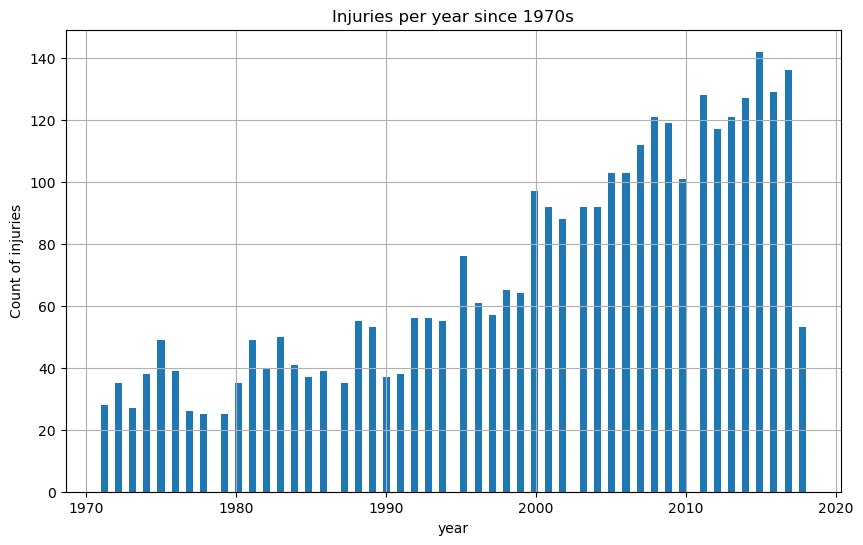

In [79]:
plt.figure(figsize=(10, 6))
data = sharks[sharks.year > 1970].year

data.hist(bins=100)

plt.ylabel('Count of injuries')
plt.xlabel('year');
plt.title('Injuries per year since 1970s')

In [80]:
#ATAQUES POR SEXO

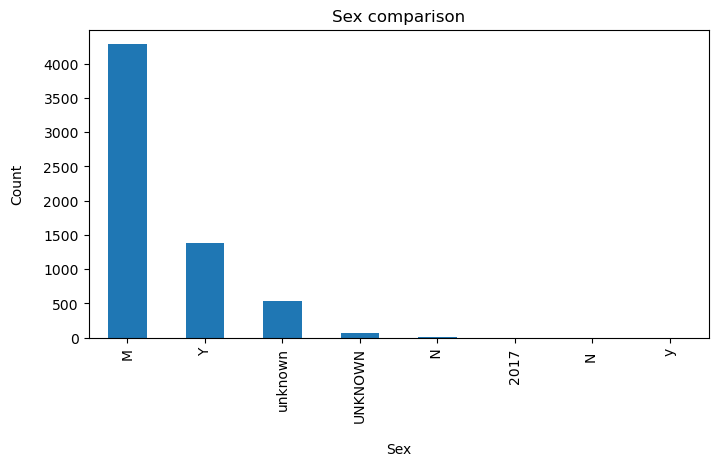

In [81]:
plt.figure(figsize=(8, 4))

df.sex.value_counts().plot.bar();
plt.xlabel("Sex", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Sex comparison");


In [84]:
#sacamos valores nulos de las columnas
not_unknown = sharks['species'] != 'unknown'

sharks3 = sharks[not_unknown]

In [87]:
fatal = sharks3.groupby('species').agg({'fatal_count': 'sum', 'country': lambda x: x.mode().tolist()[:1]})
fatal


,fatal_count,country
species,,
,1.0,[BRAZIL]
Angel shark,0.0,[SPAIN]
Basking shark,2.0,[SCOTLAND]
Blue shark,10.0,[AUSTRALIA]
Bronze whaler shark,4.0,[AUSTRALIA]
Bull shark,40.0,[USA]
Dogfish shark,0.0,[ENGLAND]
Dusky shark,0.0,[SOUTH AFRICA]
Galapagos shark,2.0,[ECUADOR]


<Figure size 1500x900 with 0 Axes>

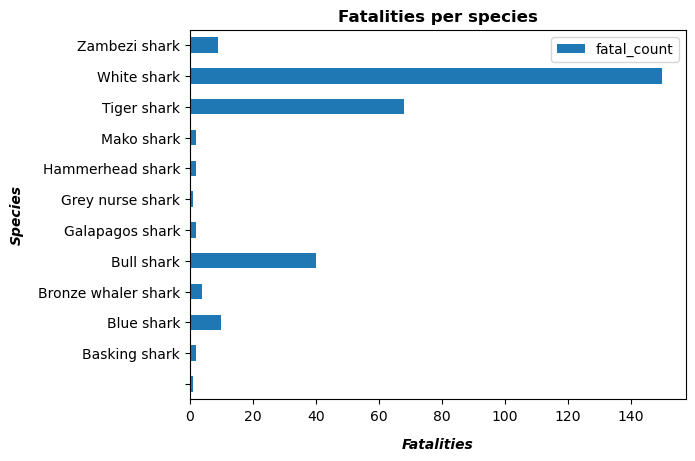

In [88]:
plt.figure(figsize=(15, 9))
fatal[(fatal.fatal_count>0)].plot.barh();
plt.xlabel("Fatalities", labelpad=10, fontweight='semibold', fontstyle='italic')
plt.ylabel("Species", labelpad=10, fontweight='semibold', fontstyle='italic')
plt.title("Fatalities per species", fontweight='bold');